In [345]:
#importating libraries 
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark import SparkConf

from pyspark.sql.functions import desc
from pyspark.sql.functions import *
import pyspark.sql.functions as F
from pyspark.sql.functions import corr

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

In [346]:
#Requirement configuration 
SparkSession \
  .builder \
  .master("local[*]")\
  .appName("Pyspark SQL") \
  .config("spark.memory.fraction", 0.8) \
  .config("spark.executor.memory", "16g") \
  .config("spark.driver.memory", "16g")\
  .config("spark.sql.shuffle.partitions" , "800") \
  .config("spark.memory.offHeap.enabled",'true')\
  .config("spark.memory.offHeap.size","16g")\
  .getOrCreate()

In [347]:
sp = SparkSession.builder.getOrCreate()
spark = SparkSession(sp)

In [348]:
pwd

'C:\\Users\\Admin\\Desktop\\Data Visulization'

In [349]:
df = spark.read.csv('C:/Users/Admin/Desktop/Data Visulization/train.csv',inferSchema="true", header="true")

In [350]:
#counting dataset
df.count()

54808

In [351]:
#countign rows...
len(df.columns)

14

In [352]:
#printing Schema 
df.printSchema()

root
 |-- employee_id: integer (nullable = true)
 |-- department: string (nullable = true)
 |-- region: string (nullable = true)
 |-- education: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- recruitment_channel: string (nullable = true)
 |-- no_of_trainings: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- previous_year_rating: integer (nullable = true)
 |-- length_of_service: integer (nullable = true)
 |-- KPIs_met >80%: integer (nullable = true)
 |-- awards_won?: integer (nullable = true)
 |-- avg_training_score: integer (nullable = true)
 |-- is_promoted: integer (nullable = true)



In [353]:
#checking into data 
df.describe().show()

+-------+------------------+----------+--------+----------------+------+-------------------+------------------+-----------------+--------------------+------------------+-------------------+--------------------+------------------+-------------------+
|summary|       employee_id|department|  region|       education|gender|recruitment_channel|   no_of_trainings|              age|previous_year_rating| length_of_service|      KPIs_met >80%|         awards_won?|avg_training_score|        is_promoted|
+-------+------------------+----------+--------+----------------+------+-------------------+------------------+-----------------+--------------------+------------------+-------------------+--------------------+------------------+-------------------+
|  count|             54808|     54808|   54808|           52399| 54808|              54808|             54808|            54808|               50684|             54808|              54808|               54808|             54808|              54808|


In [354]:
#viewing the record of the table 
df.take(1)

[Row(employee_id=65438, department='Sales & Marketing', region='region_7', education="Master's & above", gender='f', recruitment_channel='sourcing', no_of_trainings=1, age=35, previous_year_rating=5, length_of_service=8, KPIs_met >80%=1, awards_won?=0, avg_training_score=49, is_promoted=0)]

In [355]:
#selecting specific column 
DF1= df.select('employee_id','department','gender').show(10)

+-----------+-----------------+------+
|employee_id|       department|gender|
+-----------+-----------------+------+
|      65438|Sales & Marketing|     f|
|      65141|       Operations|     m|
|       7513|Sales & Marketing|     m|
|       2542|Sales & Marketing|     m|
|      48945|       Technology|     m|
|      58896|        Analytics|     m|
|      20379|       Operations|     f|
|      16290|       Operations|     m|
|      73202|        Analytics|     m|
|      28911|Sales & Marketing|     m|
+-----------+-----------------+------+
only showing top 10 rows



In [356]:
#dropping duplicates 
df.dropDuplicates()

DataFrame[employee_id: int, department: string, region: string, education: string, gender: string, recruitment_channel: string, no_of_trainings: int, age: int, previous_year_rating: int, length_of_service: int, KPIs_met >80%: int, awards_won?: int, avg_training_score: int, is_promoted: int]

In [357]:
df.select('employee_id').distinct().count()

54808

In [358]:
#dropping duplicates 
df.dropDuplicates()

DataFrame[employee_id: int, department: string, region: string, education: string, gender: string, recruitment_channel: string, no_of_trainings: int, age: int, previous_year_rating: int, length_of_service: int, KPIs_met >80%: int, awards_won?: int, avg_training_score: int, is_promoted: int]

In [359]:
#filling the null values with
df = df.fillna(0)

In [360]:
#percentage of missing values 
total = df.count()
for col in df.columns:
    df_filter = (df.filter(df[col]=="0")).count()
    percen_filter = df_filter/total
    print(col, "\t", "with ‘0’ values: ", percen_filter)

employee_id 	 with ‘0’ values:  0.0
department 	 with ‘0’ values:  0.0
region 	 with ‘0’ values:  0.0
education 	 with ‘0’ values:  0.0
gender 	 with ‘0’ values:  0.0
recruitment_channel 	 with ‘0’ values:  0.0
no_of_trainings 	 with ‘0’ values:  0.0
age 	 with ‘0’ values:  0.0
previous_year_rating 	 with ‘0’ values:  0.07524448985549555
length_of_service 	 with ‘0’ values:  0.0
KPIs_met >80% 	 with ‘0’ values:  0.6480258356444315
awards_won? 	 with ‘0’ values:  0.9768282002627353
avg_training_score 	 with ‘0’ values:  0.0
is_promoted 	 with ‘0’ values:  0.9148299518318493


In [361]:
#print missing columns 
missing_col =[]
for col in df.columns:
    df_filter = (df.filter(df[col]=="0")).count()
    if(df_filter > 0):
        missing_col.append(col)
print(missing_col)

['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']


In [362]:
#exploring dataset 
df.groupBy(df.department).count().sort(desc("count")).show(20)

+-----------------+-----+
|       department|count|
+-----------------+-----+
|Sales & Marketing|16840|
|       Operations|11348|
|      Procurement| 7138|
|       Technology| 7138|
|        Analytics| 5352|
|          Finance| 2536|
|               HR| 2418|
|            Legal| 1039|
|              R&D|  999|
+-----------------+-----+



In [363]:
#selecting distinct eduction 
df.select("education").distinct().count()

4

In [364]:
df.groupBy(df.education).count().sort(desc("count")).show(20)

+----------------+-----+
|       education|count|
+----------------+-----+
|      Bachelor's|36669|
|Master's & above|14925|
|            null| 2409|
| Below Secondary|  805|
+----------------+-----+



In [365]:
df1 = df.groupBy(df.department, df.education).count().sort(desc("count"))

In [366]:
df1.filter(df.department.contains('Sales & Marketing')).show(20,truncate = False)

+-----------------+----------------+-----+
|department       |education       |count|
+-----------------+----------------+-----+
|Sales & Marketing|Bachelor's      |11099|
|Sales & Marketing|Master's & above|4166 |
|Sales & Marketing|null            |1575 |
+-----------------+----------------+-----+



In [367]:
df

DataFrame[employee_id: int, department: string, region: string, education: string, gender: string, recruitment_channel: string, no_of_trainings: int, age: int, previous_year_rating: int, length_of_service: int, KPIs_met >80%: int, awards_won?: int, avg_training_score: int, is_promoted: int]

In [368]:
#Checking Null values 
df.where(F.isnull(F.col("employee_id"))).count()

0

In [369]:
df.where(F.isnull(F.col("department"))).count()

0

In [370]:
df.where(F.isnull(F.col("region"))).count()

0

In [371]:
df.where(F.isnull(F.col("education"))).count()

2409

In [372]:
df.where(F.isnull(F.col("gender"))).count()

0

In [373]:
df.where(F.isnull(F.col("recruitment_channel"))).count()

0

In [374]:
df.where(F.isnull(F.col("no_of_trainings"))).count()

0

In [375]:
df.where(F.isnull(F.col("age"))).count()

0

In [376]:
df.where(F.isnull(F.col("previous_year_rating"))).count()

0

In [377]:
df.where(F.isnull(F.col("length_of_service"))).count()

0

In [378]:
df.where(F.isnull(F.col("KPIs_met >80%"))).count()

0

In [379]:
df.where(F.isnull(F.col("awards_won?"))).count()

0

In [380]:
df.where(F.isnull(F.col("avg_training_score"))).count()

0

In [381]:
df.where(F.isnull(F.col("is_promoted"))).count()

0

In [382]:
df2 = df.na.fill({'education' : 'undefined'})

In [383]:
df2.where(F.isnull(F.col("education"))).count()

0

In [384]:

df2

DataFrame[employee_id: int, department: string, region: string, education: string, gender: string, recruitment_channel: string, no_of_trainings: int, age: int, previous_year_rating: int, length_of_service: int, KPIs_met >80%: int, awards_won?: int, avg_training_score: int, is_promoted: int]

In [385]:
df2.select("employee_id").distinct().count()

54808

In [386]:
#sorting values of department 
df.groupBy(df.department).count().sort(desc("count")).show(10, truncate = False)

+-----------------+-----+
|department       |count|
+-----------------+-----+
|Sales & Marketing|16840|
|Operations       |11348|
|Technology       |7138 |
|Procurement      |7138 |
|Analytics        |5352 |
|Finance          |2536 |
|HR               |2418 |
|Legal            |1039 |
|R&D              |999  |
+-----------------+-----+



In [387]:
#sorting values of region 
df.groupBy(df.region).count().sort(desc("count")).show(20,truncate = False)

+---------+-----+
|region   |count|
+---------+-----+
|region_2 |12343|
|region_22|6428 |
|region_7 |4843 |
|region_15|2808 |
|region_13|2648 |
|region_26|2260 |
|region_31|1935 |
|region_4 |1703 |
|region_27|1659 |
|region_16|1465 |
|region_28|1318 |
|region_11|1315 |
|region_23|1175 |
|region_29|994  |
|region_32|945  |
|region_19|874  |
|region_20|850  |
|region_14|827  |
|region_25|819  |
|region_17|796  |
+---------+-----+
only showing top 20 rows



In [388]:
#sorting values by education before handling null
df.groupBy(df.education).count().sort(desc("count")).show(10,truncate = False)

+----------------+-----+
|education       |count|
+----------------+-----+
|Bachelor's      |36669|
|Master's & above|14925|
|null            |2409 |
|Below Secondary |805  |
+----------------+-----+



In [389]:
#sorting values by education after handling null
df2.groupBy(df2.education).count().sort(desc("count")).show(10,truncate = False)

+----------------+-----+
|education       |count|
+----------------+-----+
|Bachelor's      |36669|
|Master's & above|14925|
|undefined       |2409 |
|Below Secondary |805  |
+----------------+-----+



In [390]:
#sorting values based on gender 
df.groupBy(df.gender).count().sort(desc("count")).show(2,truncate=False)

+------+-----+
|gender|count|
+------+-----+
|m     |38496|
|f     |16312|
+------+-----+



In [391]:
#sorting values based on recruitment channel
df.groupBy(df.recruitment_channel).count().sort(desc("count")).show(truncate=False)

+-------------------+-----+
|recruitment_channel|count|
+-------------------+-----+
|other              |30446|
|sourcing           |23220|
|referred           |1142 |
+-------------------+-----+



In [392]:
#sorting values of rating of last year 
df.groupBy(df.previous_year_rating).count().sort(desc("count")).show(truncate = False)

+--------------------+-----+
|previous_year_rating|count|
+--------------------+-----+
|3                   |18618|
|5                   |11741|
|4                   |9877 |
|1                   |6223 |
|2                   |4225 |
|0                   |4124 |
+--------------------+-----+



In [393]:
#saving cleaned data into new CSV file 
import pandas as pd
df2.toPandas().to_csv('C:/Users/Admin/Desktop/Data Visulization/newdata.csv')

In [394]:
df_filtered.drop("_c0")

DataFrame[employee_id: int, department: string, region: string, education: string, gender: string, recruitment_channel: string, no_of_trainings: int, age: int, previous_year_rating: int, length_of_service: int, KPIs_met >80%: int, awards_won?: int, avg_training_score: int, is_promoted: int]

In [395]:
#data Visulization

dvd = df_filtered.toPandas()

In [396]:
dvd

,_c0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3,17,0,0,78,0
54804,54804,74592,Operations,region_27,Master's & above,f,other,1,37,2,6,0,0,56,0
54805,54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5,3,1,0,79,0
54806,54806,13614,Sales & Marketing,region_9,undefined,m,sourcing,1,29,1,2,0,0,45,0


In [397]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import math

<AxesSubplot:>

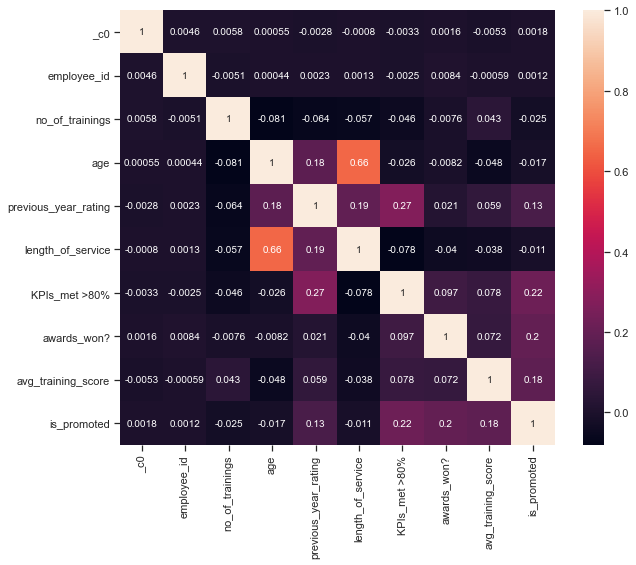

In [398]:
#Co-relation matrix 
corr=dvd.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,square=True,annot=True)

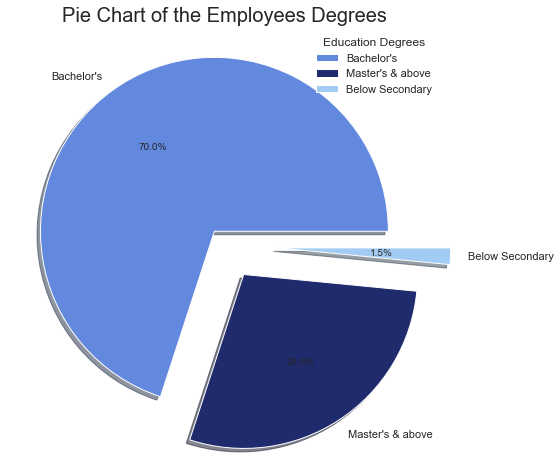

In [399]:
#plotting a pie chart
size = [36669,14925,805]
label=["Bachelor's","Master's & above",'Below Secondary']
color=['#6389df','#1f2b6c','#a3ccf4']
explode = [0.1, 0.2 , 0.3]
plt.figure(figsize=(8,8))
plt.pie(size,labels=label,colors=color,explode=explode,shadow=True,autopct="%.1f%%")
plt.title("Pie Chart of the Employees Degrees", fontsize = 20)
plt.axis('off')
plt.legend(title='Education Degrees')
plt.show()

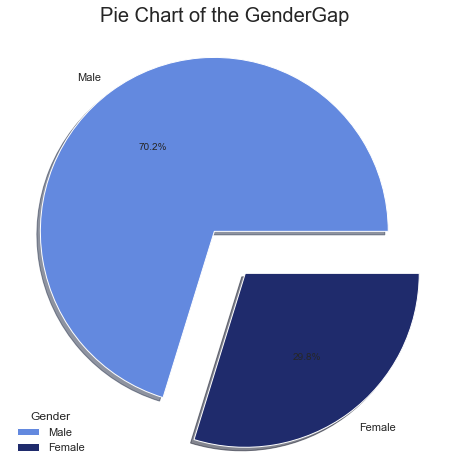

In [400]:
#plotting a pie chart
size = [38496,16312]
label=["Male","Female"]
color=['#6389df','#1f2b6c']
explode = [0.1, 0.2 ]
plt.figure(figsize=(8,8))
plt.pie(size,labels=label,colors=color,explode=explode,shadow=True,autopct="%.1f%%")
plt.title("Pie Chart of the GenderGap", fontsize = 20)
plt.axis('off')
plt.legend(title='Gender')
plt.show()

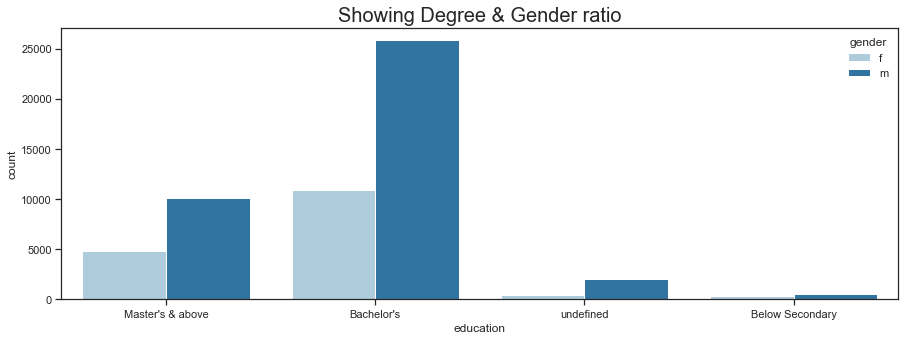

In [401]:
plt.subplots(figsize=(15,5))
sns.countplot(x = 'education', data = dvd, hue = 'gender', palette = 'Paired')
plt.title('Showing Degree & Gender ratio', fontsize = 20)
plt.show()

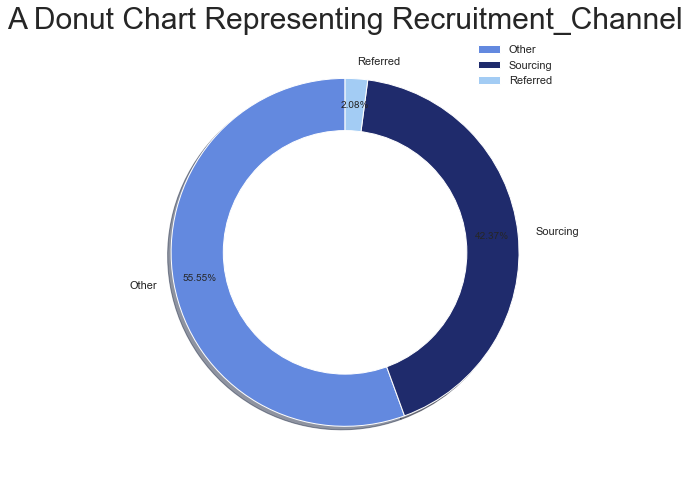

In [402]:
size=[30446,23220,1142]
label=["Other","Sourcing",'Referred']
color=['#6389df','#1f2b6c','#a3ccf4']
explode=[.05,.05,.05]
plt.figure(figsize=(8,8))
plt.pie(size,labels=label,colors=color, startangle=90,shadow=True,autopct="%.2f%%",pctdistance=.85)

center_circle=plt.Circle((0,0),.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('A Donut Chart Representing Recruitment_Channel', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


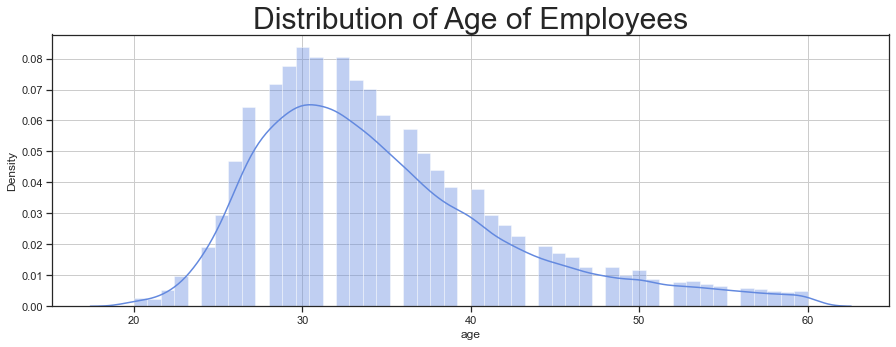

In [403]:
plt.figure(figsize=(15,5))
sns.distplot(dvd['age'],color='#6389df')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.grid(axis='both')
plt.show()

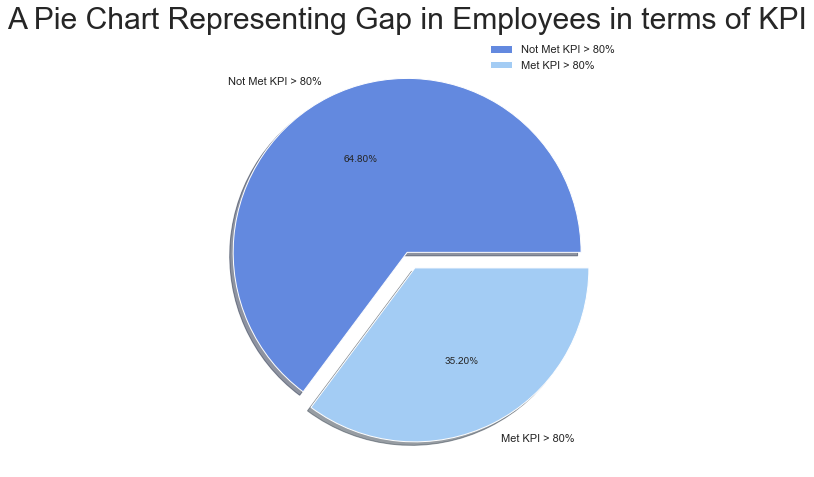

In [404]:
size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
color=['#6389df','#a3ccf4']
explode = [0, 0.1]
plt.figure(figsize=(8,8))
plt.pie(size, labels = labels, colors = color, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

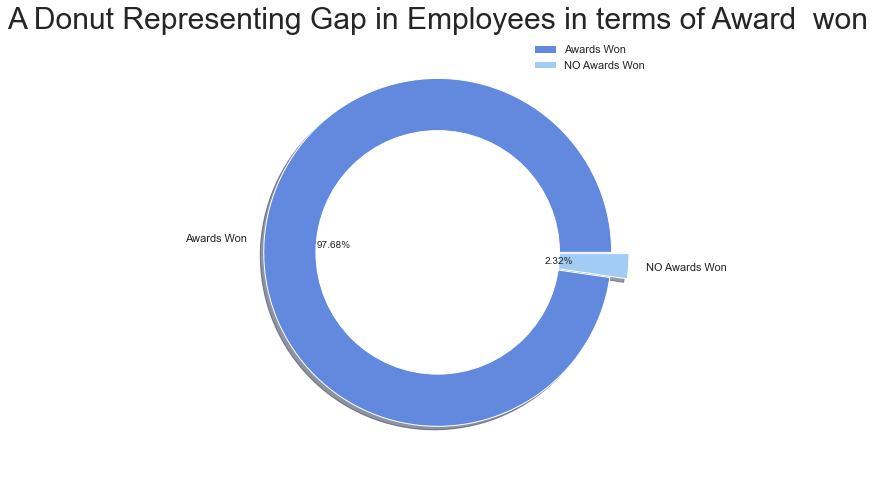

In [405]:
size = [53538,1270]
labels = "Awards Won", "NO Awards Won"
color=['#6389df','#a3ccf4']
explode = [0, 0.1]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.figure(figsize=(8,8))
plt.pie(size, labels = labels, colors = color, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Donut Representing Gap in Employees in terms of Award  won', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

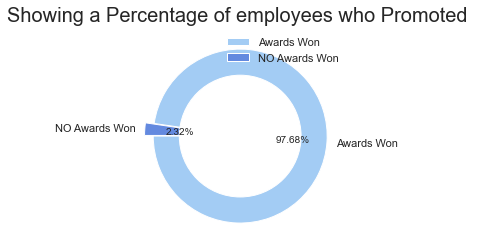

In [406]:
color=['#a3ccf4','#6389df']
explode = [0, 0.1]

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = color, explode = explode, shadow =False, autopct = "%.2f%%",startangle=180)
plt.title('Showing a Percentage of employees who Promoted ' , fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

array([[<AxesSubplot:title={'center':'_c0'}>,
        <AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>],
       [<AxesSubplot:title={'center':'KPIs_met >80%'}>,
        <AxesSubplot:title={'center':'awards_won?'}>,
        <AxesSubplot:title={'center':'avg_training_score'}>],
       [<AxesSubplot:title={'center':'is_promoted'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

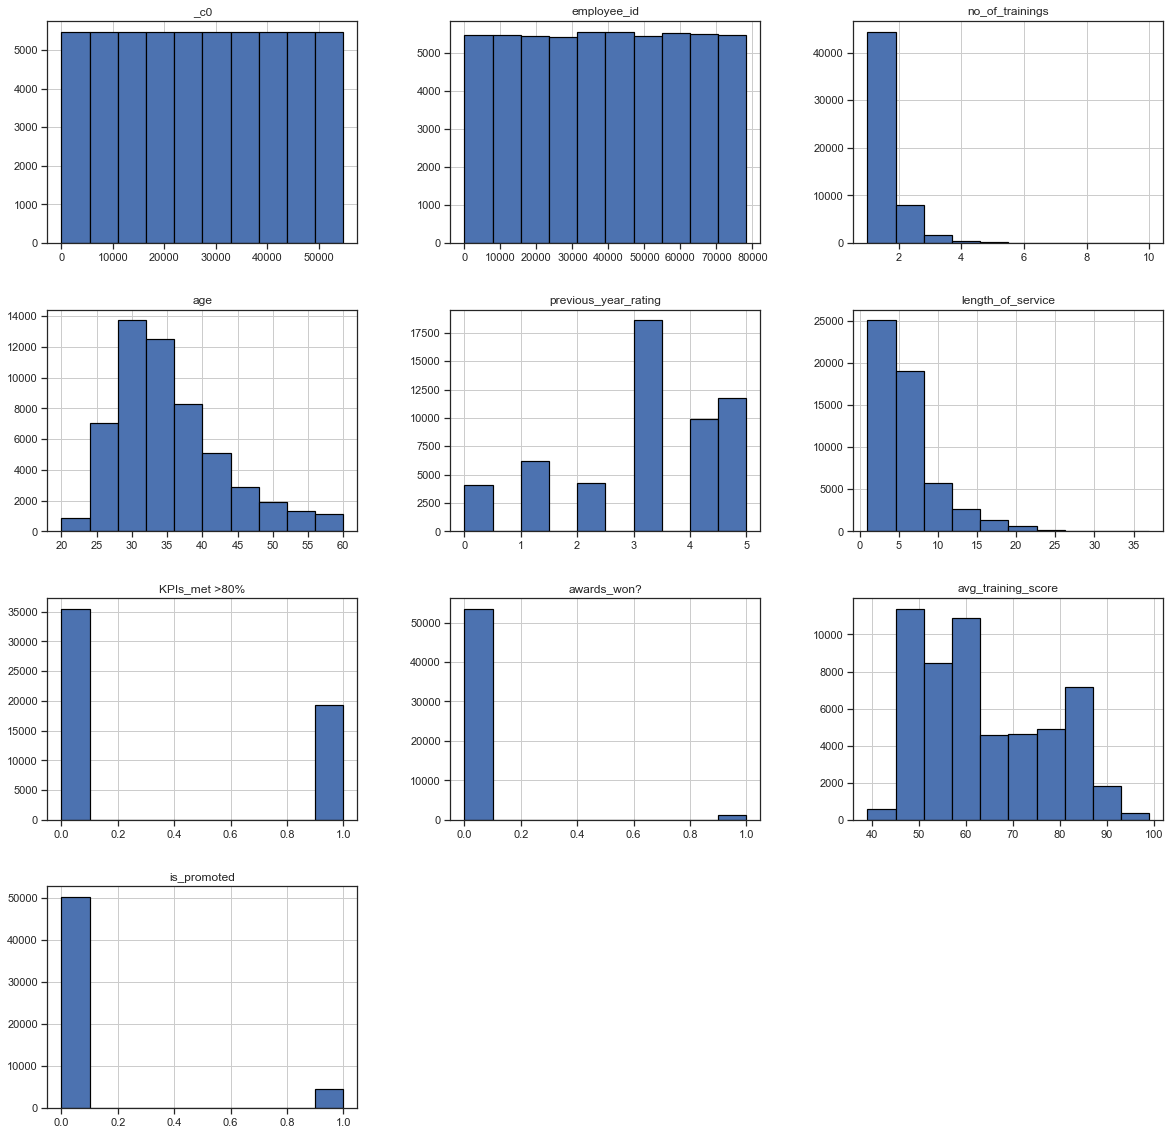

In [407]:
# histplot for every feature
dvd.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

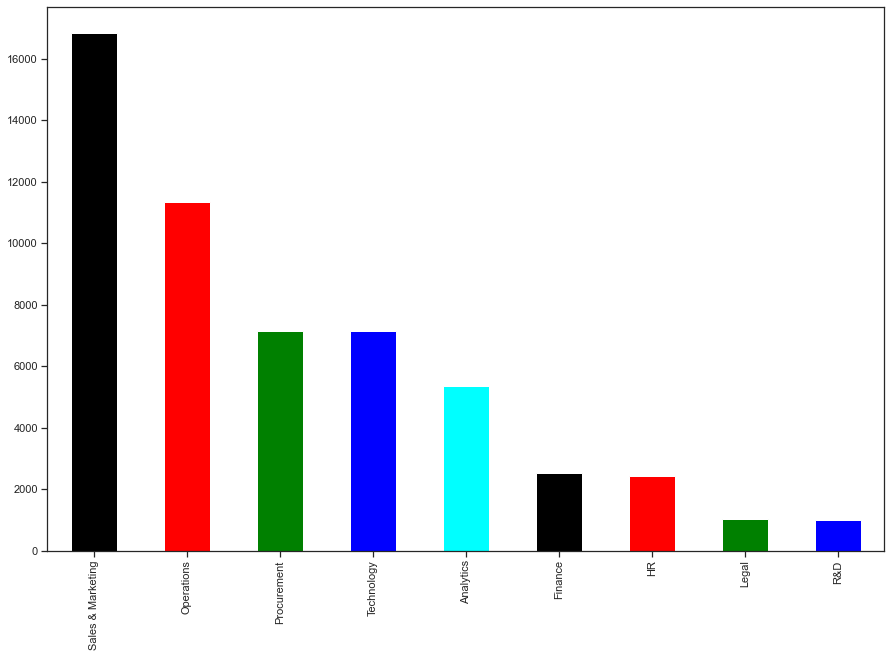

In [408]:
# Visualize the department column
plt.subplots(figsize = (15,10))
dvd['department'].value_counts(normalize = True)
dvd['department'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

In [409]:
#Machine Learning 
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import VectorIndexer
from pyspark.sql.functions import col, explode, array, lit
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

In [410]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.types import IntegerType
from pyspark.sql.types import StructField,IntegerType, StructType,StringType

from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

In [411]:
df_filtered = spark.read.option('header','true').option('inferSchema','true').csv("newdata.csv")

In [412]:
from pyspark.ml.feature import VectorAssembler
data2 = df_filtered.select(df_filtered.no_of_trainings,df_filtered.age.alias('label'))
train, test = data2.randomSplit([0.7,0.3])
assembler = VectorAssembler().setInputCols(['no_of_trainings',]).setOutputCol('features')
t1 = assembler.transform(train)
''' we only need features and label column '''
t2 = train01.select("features","label")
t2.show(truncate=False)

+--------+-----+
|features|label|
+--------+-----+
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
|[1.0]   |20   |
+--------+-----+
only showing top 20 rows



In [413]:
#Importing LinearRegression 
from pyspark.ml.regression import LinearRegression
lr = LinearRegression()
model = lr.fit(train02)
t0 = assembler.transform(test)
t12 = test01.select('features', 'label')
t3 = model.transform(test02)
t3.show(truncate=False)

+--------+-----+-----------------+
|features|label|prediction       |
+--------+-----+-----------------+
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
|[1.0]   |20   |35.03166113913454|
+--------+-----+-----------------+
only showing top 20 rows



In [414]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator()
print(evaluator.evaluate(t3,{evaluator.metricName: "r2"}))

0.005822906188958199


In [415]:
print(model.coefficients)

[-1.053998208391581]


In [416]:
print(evaluator.evaluate(t3,{evaluator.metricName: "mse"}))
print(evaluator.evaluate(t3,{evaluator.metricName: "rmse"}))
print(evaluator.evaluate(t3,{evaluator.metricName: "mae"}))

58.21271894695063
7.629726007331497
5.911228000722698


In [417]:
print(model.intercept)

36.085659347526125
